In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv("brain.csv")  
print(df.head())


           Brain_061225         NMR #          10      20      30      40  \
0                   NaN      Sample #         1MN     2MN     3MN     4MN   
1             PPM Range      Compound  SIMPL-DREX     NaN     NaN     NaN   
2     8.474      8.452        Formate       0.003  0.0051  0.0047  0.0043   
3   8.364      8.336          Inosine      0.0124  0.0129  0.0357  0.0056   
4    8.205      8.182    Hypoxanthine      0.0079  0.0196  0.0107  0.0132   

           50        60      70      80  ...   110.1   120.1   130.1   140.1  \
0         5MN       1X1     2X1     3X1  ...     1Y2     2Y2     3Y2     4Y2   
1         NaN  80% MEOH     NaN     NaN  ...     NaN     NaN     NaN     NaN   
2  0.00475676    0.0039  0.0033  0.0029  ...  0.0133  0.0132  0.0148  0.0112   
3   0.0270627    0.0143  0.0174  0.0347  ...  0.0001  0.0005  0.0013  0.0003   
4   0.0118233    0.0085  0.0332  0.0116  ...       0       0  0.0025       0   

    150.1   160.1   170.1   180.1 190.1 200.1  
0     5X

In [8]:
# Skip first two rows of csv file
df = pd.read_csv('brain.csv', skiprows=2)

# Extract compound names
compound_names = df.iloc[:, 1]  # Second column is compound names




In [9]:
# Extract values by column indices (adjust if needed)
drex = df.iloc[:, 2:7].apply(pd.to_numeric, errors='coerce')      # SIMPL-DREX
meoh = df.iloc[:, 7:12].apply(pd.to_numeric, errors='coerce')     # 80% Methanol
acn  = df.iloc[:, 12:17].apply(pd.to_numeric, errors='coerce')    # 60% Acetonitrile

# Calculate means and stds
drex_mean = drex.mean(axis=1)
drex_std = drex.std(axis=1)

meoh_mean = meoh.mean(axis=1)
meoh_std = meoh.std(axis=1)

acn_mean = acn.mean(axis=1)
acn_std = acn.std(axis=1)



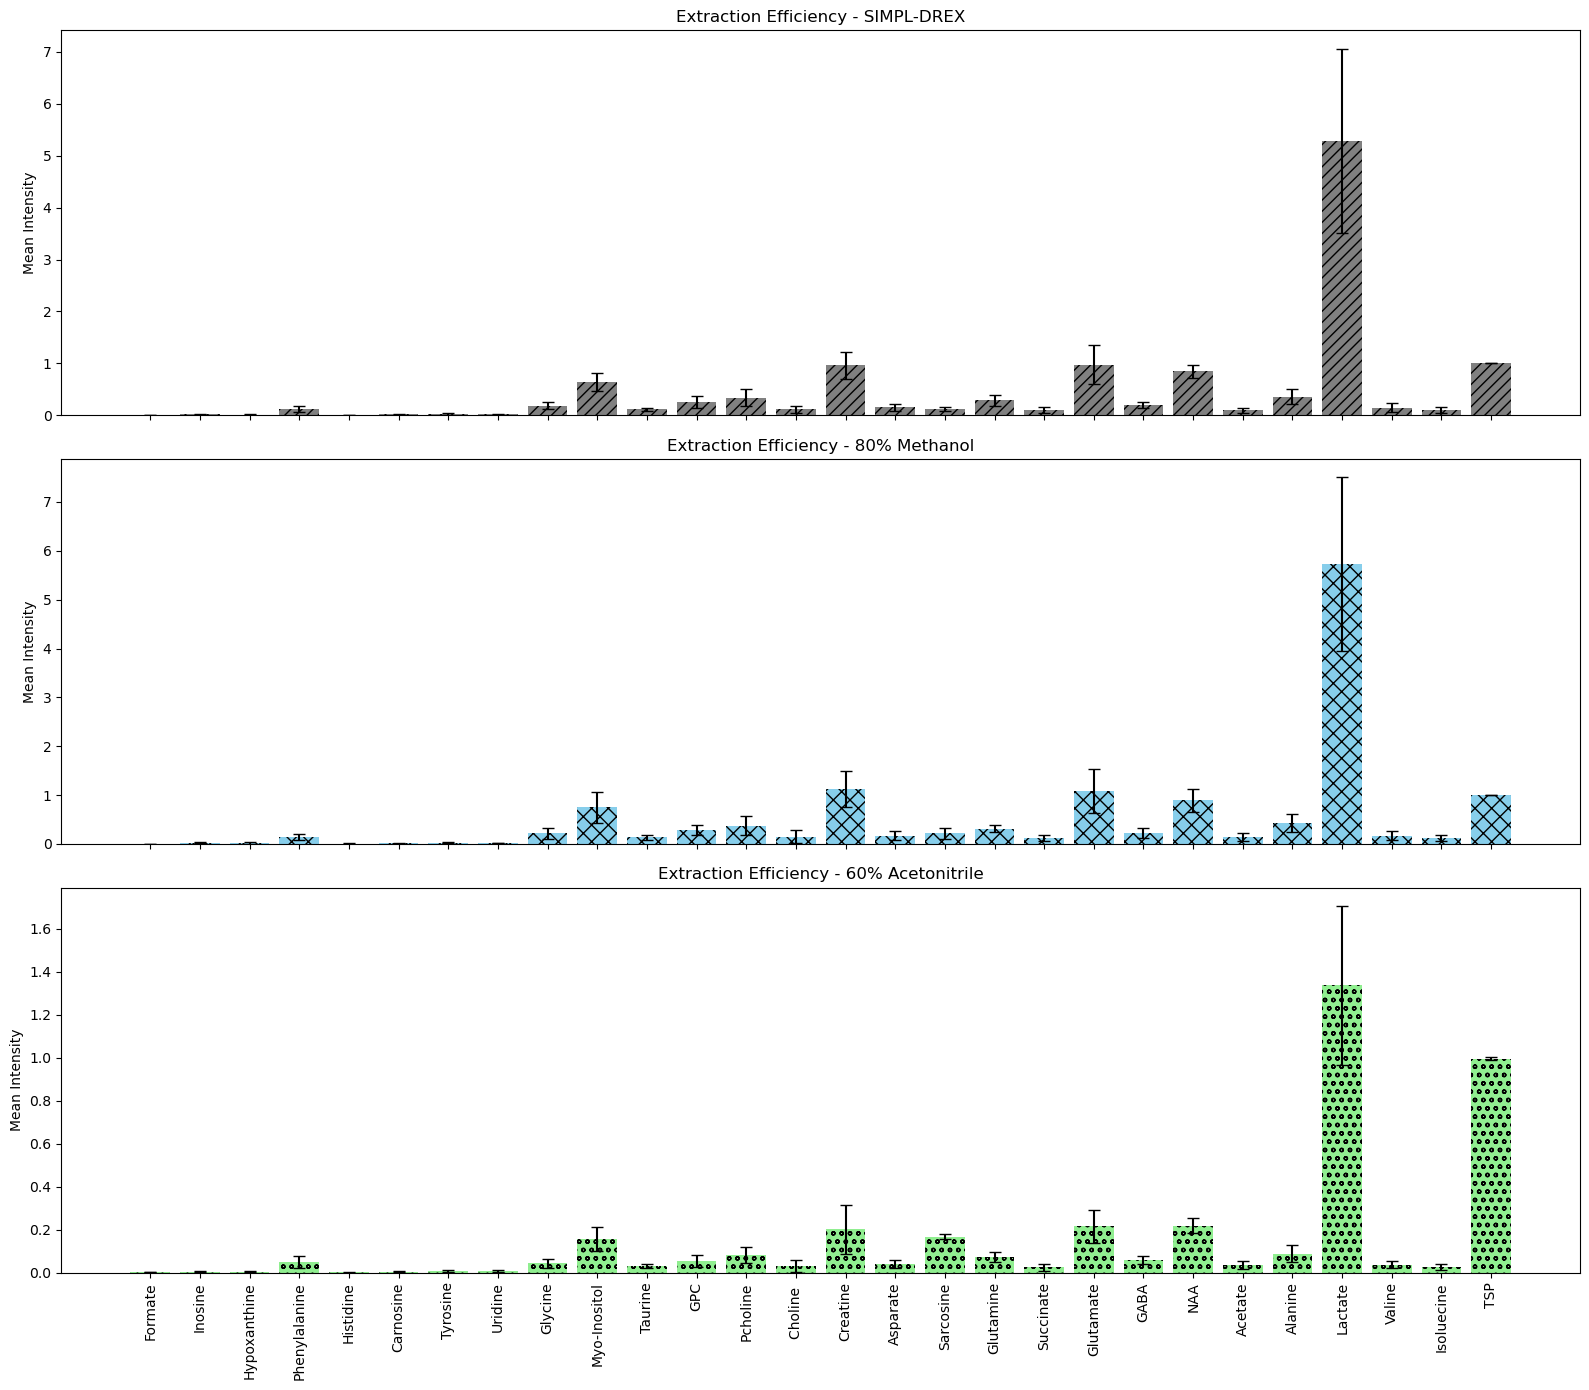

In [10]:
# Plotting
x = np.arange(len(compound_names))
fig, axs = plt.subplots(3, 1, figsize=(16, 14), sharex=True)

# SIMPL-DREX
axs[0].bar(x, drex_mean, yerr=drex_std, capsize=4, color='gray', hatch='///')
axs[0].set_title("Extraction Efficiency - SIMPL-DREX")
axs[0].set_ylabel("Mean Intensity")

# 80% Methanol
axs[1].bar(x, meoh_mean, yerr=meoh_std, capsize=4, color='skyblue', hatch='xx')
axs[1].set_title("Extraction Efficiency - 80% Methanol")
axs[1].set_ylabel("Mean Intensity")

# 60% Acetonitrile
axs[2].bar(x, acn_mean, yerr=acn_std, capsize=4, color='lightgreen', hatch='oo')
axs[2].set_title("Extraction Efficiency - 60% Acetonitrile")
axs[2].set_ylabel("Mean Intensity")
axs[2].set_xticks(x)
axs[2].set_xticklabels(compound_names, rotation=90)

plt.tight_layout()
plt.show()

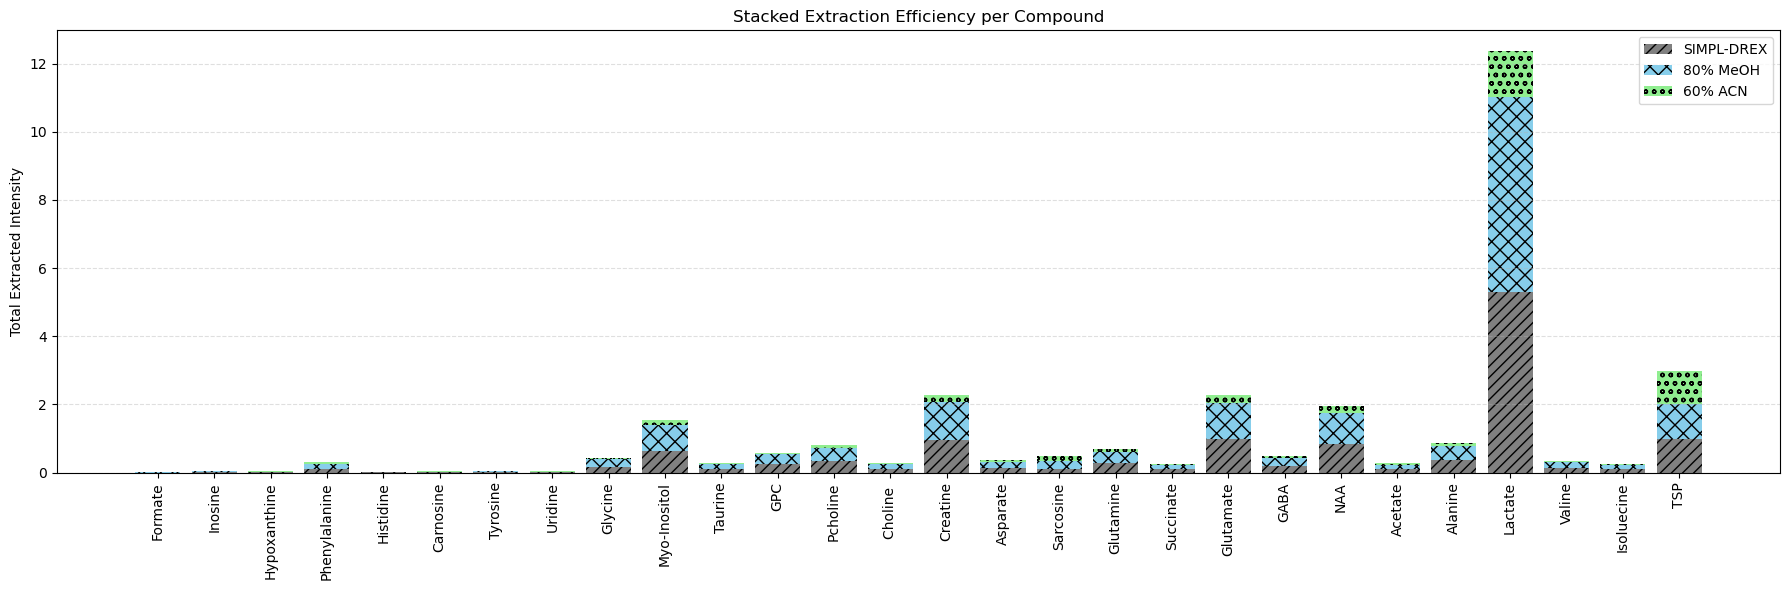

In [13]:
x = np.arange(len(compound_names))
plt.figure(figsize=(18, 6))

# SIMPL-DREX (bottom layer)
plt.bar(x, drex_mean, label='SIMPL-DREX', color='gray', hatch='///')

# 80% MeOH (stacked on top of DREX)
plt.bar(x, meoh_mean, bottom=drex_mean, label='80% MeOH', color='skyblue', hatch='xx')

# 60% ACN (stacked on top of DREX + MeOH)
plt.bar(x, acn_mean, bottom=drex_mean + meoh_mean, label='60% ACN', color='lightgreen', hatch='oo')

# Labels
plt.xticks(x, compound_names, rotation=90)
plt.ylabel("Total Extracted Intensity")
plt.title("Stacked Extraction Efficiency per Compound")
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()